In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from textblob import TextBlob
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import plot_importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


In [23]:
df_2019 = pd.read_csv('../Data/2019_full_dataset2.csv')


In [24]:
def data_properties(year):
    print("properties for year are as follows :\n")
    print("column details:\n")
    print(year.columns)
    print("shape:\n")
    print(year.shape)
    print("info about dataset:\n")
    print(year.info())
    print("\n")


In [25]:
data_properties(df_2019)

properties for year are as follows :

column details:

Index(['Unnamed: 0', 'id', 'name', 'popularity', 'track.track_number',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'artists'],
      dtype='object')
shape:

(50, 19)
info about dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          50 non-null     int64  
 1   id                  50 non-null     object 
 2   name                50 non-null     object 
 3   popularity          50 non-null     int64  
 4   track.track_number  50 non-null     int64  
 5   danceability        50 non-null     float64
 6   energy              50 non-null     float64
 7   key                 50 non-null     int64  
 8   loudness      

In [26]:
def checkfornull(year):
    print("cheking for null values......")
    print(year.columns[year.isnull().any()])
    output=year.isnull().sum()
    return output 

In [27]:
checkfornull(df_2019)

cheking for null values......
Index([], dtype='object')


Unnamed: 0            0
id                    0
name                  0
popularity            0
track.track_number    0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_ms           0
time_signature        0
artists               0
dtype: int64

In [28]:
# in the data we obsrve that all the data is not in float .So , in order to maintain a symetry,we will 
# convert the non float data to float data type

def float_conversion(column,value):
    column= pd.to_numeric(value, downcast="float")
    return column


In [29]:
float_conversion(df_2019.mode,df_2019["mode"])
float_conversion(df_2019.duration_ms,df_2019["duration_ms"])
float_conversion(df_2019.time_signature,df_2019["time_signature"])

df_2019.head()


,Unnamed: 0,id,name,popularity,track.track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artists
0,0,6v3KW9xbzN5yKLt9YKDYA2,Señorita,83,1,0.759,0.548,9,-6.049,0,0.0290,0.0392,0.00,0.0828,0.749,116.967,190800,4,Shawn Mendes
1,1,2Fxmhks0bxGSBdJ92vM42m,bad guy,90,2,0.701,0.425,7,-10.965,1,0.3750,0.3280,0.13,0.1000,0.562,135.128,194088,4,Billie Eilish
2,2,0RiRZpuVRbi7oqRdSMwhQY,Sunflower - Spider-Man: Into the Spider-Verse,83,12,0.755,0.522,2,-4.368,1,0.0575,0.5330,0.00,0.0685,0.925,89.960,157560,4,Post Malone
3,3,6ocbgoVGwYJhOv1GgI9NsF,7 rings,86,10,0.778,0.317,1,-10.732,0,0.3340,0.5920,0.00,0.0881,0.327,140.048,178627,4,Ariana Grande
4,4,2YpeDb67231RjR0MgVLzsG,Old Town Road - Remix,85,1,0.878,0.619,6,-5.560,1,0.1020,0.0533,0.00,0.1130,0.639,136.041,157067,4,Lil Nas X


In [30]:
def understand_feature(feature):
    return feature.describe()


In [31]:
#The higher the value, the easier it is to dance to this song.
print("overall danceability feature\n")
understand_feature(df_2019["danceability"])


overall danceability feature



count    50.000000
mean      0.719400
std       0.130358
min       0.351000
25%       0.657500
50%       0.743000
75%       0.814500
max       0.907000
Name: danceability, dtype: float64

In [32]:
print("top 10  danceability feature\n")
understand_feature(df_2019["danceability"].head(10))



top 10  danceability feature



count    10.000000
mean      0.730800
std       0.114692
min       0.501000
25%       0.710000
50%       0.757000
75%       0.793000
max       0.878000
Name: danceability, dtype: float64

In [35]:
#sorting out more danceble songs 
df_2019['dancebility_new']=df_2019['danceability']
df_2019.loc[df_2019['danceability']>=0.6000,'dancebility_new']='1'
df_2019.loc[(df_2019['danceability']<0.6000),'dancebility_new']='0'

print(df_2019['dancebility_new'].value_counts())

1    41
0     9
Name: dancebility_new, dtype: int64


In [36]:
print("top 10  energy  feature\n")
understand_feature(df_2019["energy"].head(10))

top 10  energy  feature



count    10.000000
mean      0.529600
std       0.160433
min       0.317000
25%       0.410000
50%       0.530500
75%       0.601250
max       0.860000
Name: energy, dtype: float64

In [37]:
#understanding beats per minute i.e tempo of the song
#here we do classification of the tempo on the bases of beats per min 
#REf:https://www.musical-u.com/learn/rhythm-tips-for-identifying-music-genres-by-ear/
df_2019['tempo_rate']=df_2019['tempo']


In [38]:
df_2019.loc[df_2019['tempo']<65,'tempo_rate']='very slow'
df_2019.loc[(df_2019['tempo']>=66) & (df_2019['tempo']<=76),'tempo_rate']='slow'
df_2019.loc[(df_2019['tempo']>=76) & (df_2019['tempo']<=108),'tempo_rate']='moderate'
df_2019.loc[(df_2019['tempo']>=110) & (df_2019['tempo']<=168),'tempo_rate']='fast'
df_2019.loc[df_2019['tempo']>168,'tempo_rate']='very fast'


In [39]:
print("Tempo Rate\tCount\n")
print(df_2019['tempo_rate'].value_counts())
print("\n")
df_2019.head()

Tempo Rate	Count

moderate     22
fast         21
very fast     5
slow          1
109.891       1
Name: tempo_rate, dtype: int64




,Unnamed: 0,id,name,popularity,track.track_number,danceability,energy,key,loudness,mode,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artists,dancebility_new,tempo_rate
0,0,6v3KW9xbzN5yKLt9YKDYA2,Señorita,83,1,0.759,0.548,9,-6.049,0,...,0.0392,0.00,0.0828,0.749,116.967,190800,4,Shawn Mendes,1,fast
1,1,2Fxmhks0bxGSBdJ92vM42m,bad guy,90,2,0.701,0.425,7,-10.965,1,...,0.3280,0.13,0.1000,0.562,135.128,194088,4,Billie Eilish,1,fast
2,2,0RiRZpuVRbi7oqRdSMwhQY,Sunflower - Spider-Man: Into the Spider-Verse,83,12,0.755,0.522,2,-4.368,1,...,0.5330,0.00,0.0685,0.925,89.960,157560,4,Post Malone,1,moderate
3,3,6ocbgoVGwYJhOv1GgI9NsF,7 rings,86,10,0.778,0.317,1,-10.732,0,...,0.5920,0.00,0.0881,0.327,140.048,178627,4,Ariana Grande,1,fast
4,4,2YpeDb67231RjR0MgVLzsG,Old Town Road - Remix,85,1,0.878,0.619,6,-5.560,1,...,0.0533,0.00,0.1130,0.639,136.041,157067,4,Lil Nas X,1,fast


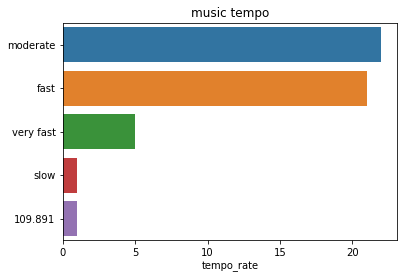

In [40]:
sns.barplot(x=pd.DataFrame(df_2019['tempo_rate'].value_counts()).tempo_rate, 
            y=pd.DataFrame(df_2019['tempo_rate'].value_counts()).index
           )
plt.title('music tempo');

sort the songs on the bases of important parametes like :

In [41]:
df_2019[['name','artists','danceability','valence','tempo','tempo_rate','energy']].sort_values(by=["danceability","energy","valence"],ascending=False).head(10)

,name,artists,danceability,valence,tempo,tempo_rate,energy
18,Old Town Road,Lil Nas X,0.907,0.507,135.998,fast,0.530
17,bury a friend,Billie Eilish,0.905,0.196,120.046,fast,0.389
19,Talk (feat. Disclosure),Khalid,0.901,0.346,135.984,fast,0.400
31,Going Bad (feat. Drake),Meek Mill,0.889,0.544,86.003,moderate,0.496
4,Old Town Road - Remix,Lil Nas X,0.878,0.639,136.041,fast,0.619
27,"Taki Taki (feat. Selena Gomez, Ozuna & Cardi B)",DJ Snake,0.842,0.617,95.881,moderate,0.801
14,Sucker,Jonas Brothers,0.842,0.952,137.958,fast,0.734
24,MIDDLE CHILD,J. Cole,0.837,0.463,123.984,fast,0.364
30,SICKO MODE,Travis Scott,0.834,0.446,155.008,fast,0.730
6,Wow.,Post Malone,0.829,0.388,99.960,moderate,0.539


as we can see that these features collectively couldn't generate the sorted manner of artist as expected.We need to change our approach and include more features 
### Analysing top artists
Analysing Top artists will give us a better idea about the feature importance 

In [47]:
#count the value:in terms on songs per year for an  artist
print("Artist\t\tSongs\n")
print(df_2019["artists"].value_counts().head(20))

Artist		Songs

Post Malone      5
Billie Eilish    4
Ariana Grande    3
Shawn Mendes     2
Anuel AA         2
Lil Nas X        2
Bad Bunny        2
Ed Sheeran       2
Lizzo            1
Pedro Capó       1
Khalid           1
Travis Scott     1
Halsey           1
Marshmello       1
Alec Benjamin    1
benny blanco     1
J. Cole          1
DJ Snake         1
Avicii           1
Sam Smith        1
Name: artists, dtype: int64


#### comparing  the  top artists based on our features 
lets start with top 5:

- Ed Sheeran          4
- The Chainsmokers    4
- Drake               3
- Martin Garrix       3
- Kendrick Lamar      2

In [61]:
def artist_features(artist_name):
    artist = df_2019[df_2019['artists']==artist_name]
    print(artist_name)
    display(artist[['name','danceability','energy','loudness','valence','tempo','tempo_rate']])

commulative_songs = df_2019["artists"].value_counts().rename_axis('artist').reset_index(name='counts')
print(commulative_songs)
all_interesting_artists = commulative_songs[commulative_songs["counts"]>1]["artist"].apply(lambda x: artist_features(x))

                 artist  counts
0           Post Malone       5
1         Billie Eilish       4
2         Ariana Grande       3
3          Shawn Mendes       2
4              Anuel AA       2
5             Lil Nas X       2
6             Bad Bunny       2
7            Ed Sheeran       2
8                 Lizzo       1
9            Pedro Capó       1
10               Khalid       1
11         Travis Scott       1
12               Halsey       1
13           Marshmello       1
14        Alec Benjamin       1
15         benny blanco       1
16              J. Cole       1
17             DJ Snake       1
18               Avicii       1
19            Sam Smith       1
20            Lil Tecca       1
21       Jonas Brothers       1
22                 Sech       1
23         Paulo Londra       1
24                 Lauv       1
25  Panic! At The Disco       1
26            Meek Mill       1
27              Ava Max       1
28          Tones And I       1
29            Lady Gaga       1
30      

,name,danceability,energy,loudness,valence,tempo,tempo_rate
2,Sunflower - Spider-Man: Into the Spider-Verse,0.755,0.522,-4.368,0.925,89.960,moderate
6,Wow.,0.829,0.539,-7.359,0.388,99.960,moderate
25,Goodbyes (Feat. Young Thug),0.580,0.653,-3.818,0.175,150.231,fast
45,Better Now,0.680,0.578,-5.804,0.341,145.038,fast
49,rockstar (feat. 21 Savage),0.585,0.520,-6.136,0.129,159.801,fast


Billie Eilish


,name,danceability,energy,loudness,valence,tempo,tempo_rate
1,bad guy,0.701,0.425,-10.965,0.562,135.128,fast
17,bury a friend,0.905,0.389,-14.505,0.196,120.046,fast
20,when the party's over,0.367,0.111,-14.084,0.198,82.642,moderate
29,lovely (with Khalid),0.351,0.296,-10.109,0.120,115.284,fast


Ariana Grande


,name,danceability,energy,loudness,valence,tempo,tempo_rate
3,7 rings,0.778,0.317,-10.732,0.327,140.048,fast
13,"thank u, next",0.717,0.653,-5.634,0.412,106.966,moderate
23,"break up with your girlfriend, i'm bored",0.726,0.554,-5.290,0.335,169.999,very fast


Shawn Mendes


,name,danceability,energy,loudness,valence,tempo,tempo_rate
0,Señorita,0.759,0.548,-6.049,0.749,116.967,fast
40,If I Can't Have You,0.691,0.823,-4.197,0.870,123.935,fast


Anuel AA


,name,danceability,energy,loudness,valence,tempo,tempo_rate
38,Secreto,0.807,0.803,-4.156,0.706,91.987,moderate
39,China,0.786,0.808,-3.702,0.609,105.027,moderate


Lil Nas X


,name,danceability,energy,loudness,valence,tempo,tempo_rate
4,Old Town Road - Remix,0.878,0.619,-5.560,0.639,136.041,fast
18,Old Town Road,0.907,0.530,-6.112,0.507,135.998,fast


Bad Bunny


,name,danceability,energy,loudness,valence,tempo,tempo_rate
33,Callaita,0.610,0.624,-4.773,0.244,176.169,very fast
34,MIA (feat. Drake),0.817,0.539,-6.349,0.158,97.062,moderate


Ed Sheeran


,name,danceability,energy,loudness,valence,tempo,tempo_rate
5,I Don't Care (with Justin Bieber),0.798,0.676,-5.041,0.843,101.956,moderate
21,Beautiful People (feat. Khalid),0.640,0.647,-8.114,0.546,92.979,moderate


## Here's the observation for the above  top 5 results:
- dancebility:Range:0.49-->0.90+
- energy:Range:0.48-->0.90+ , in general, the enegy in not very significant but  top songs have energy more than 0.48
- loudness:more -ve loudness means more popular the song is 
- valence:Range:Not a very important criteria
- tempo:Range:can not conclude about this, need more EDA
- tempo rate:Range: fast and moderate are in top



In [63]:

feture_to_plot = ["energy", "liveness", "tempo", "valence", "loudness", "speechiness", "acousticness", "danceability", "instrumentalness"]
text1 = df_2019["artists"] + " - " + df_2019["name"]
text2 = text1.values
X = df_2019[feture_to_plot].values
y = df_2019["danceability"].values
min_maxscaler = MinMaxScaler()
X = min_maxscaler.fit_transform(X)
pca = PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

plot3d = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],
    text=text2,
    mode="markers",
    marker=dict(
        size=8,
        color=y
    )
)

fig = go.Figure(data=[plot3d])
py.iplot(fig, filename="3d graph")


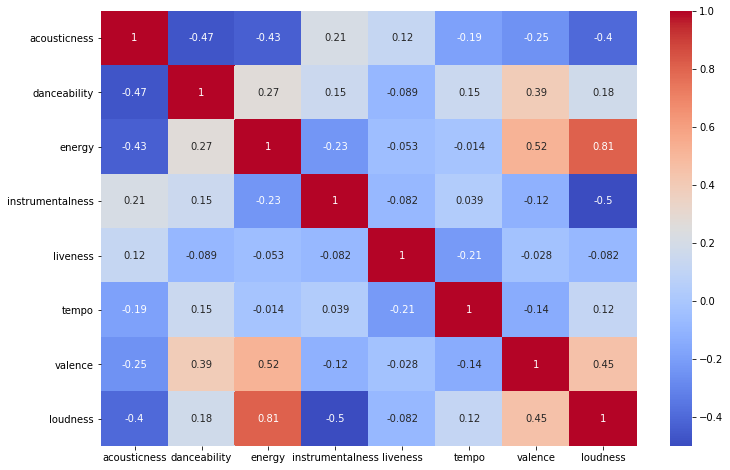

In [64]:
correlation = df_2019[['acousticness','danceability','energy','instrumentalness','liveness','tempo','valence',
                       'loudness']]
plt.figure(figsize=(12,8))
sns.heatmap(correlation.corr(), annot=True,cmap="coolwarm");

##### We can observe that there is a correlation between the loudness and the perceived energy of the song. The jointplots indicate a correlation between these two. Lets understand  how much one feature si impacted by another feature 

In [65]:
def create_joinplot(val1,val2,year,colr):
    sns.jointplot(val1,val2, data=year,kind='reg',color=colr)

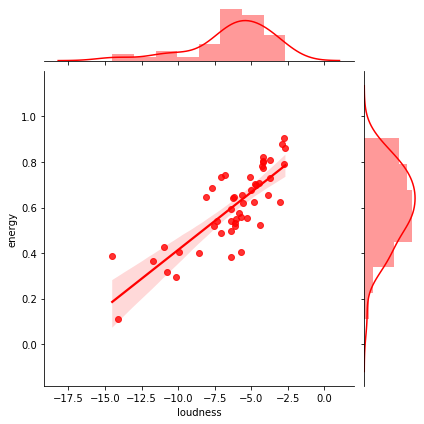

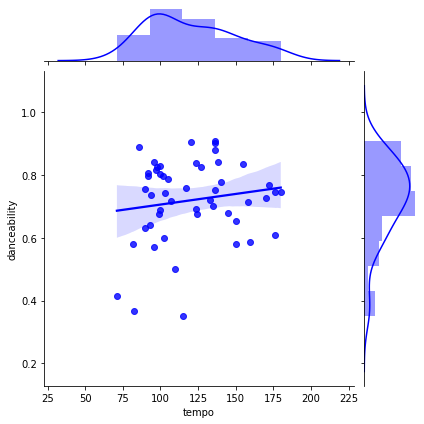

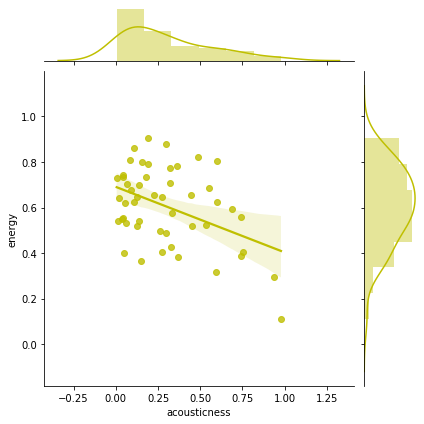

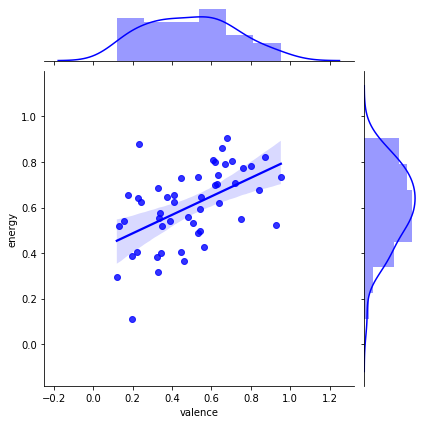

In [66]:

create_joinplot('loudness','energy',df_2019,'r')
create_joinplot('tempo','danceability',df_2019,'b')
create_joinplot('acousticness','energy',df_2019,'y')
create_joinplot('valence','energy',df_2019,'b')

### from the corelation matrix we observe that  
- there is a relation between  tempo and dancebility 
- there is a relation between  acounsticeness and energy 
- there is a relation between  tempo and acousticeness
- there is a relation between  energy and loudness
- there is a relation between  tempo and valence
- there is a relation between  valence and dancebility 
- there is a relation between  valence and energy  

#### understand these correlation features in more details ;


In [67]:
def feature_details(feature):
    print("Mean value ", feature.mean())
    sns.distplot(feature,color="r")
    plt.show()


Mean value  0.7194000000000002


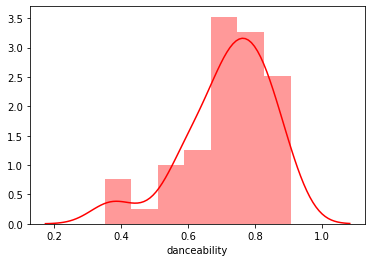

In [68]:
feature_details(df_2019['danceability'])

*Conclusion*: top songs have high dancebility.And people listen to those songs in which they can dance.

Mean value  0.60462


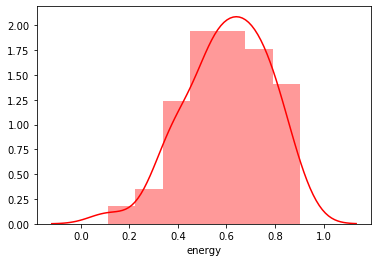

In [70]:
feature_details(df_2019['energy'])

*Conclusion*:people like energetic songs 

Mean value  -6.22902


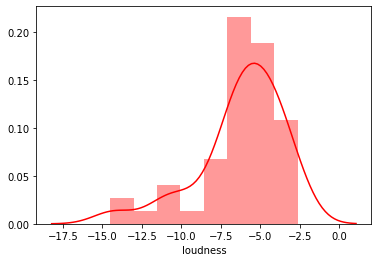

In [71]:
feature_details(df_2019['loudness'])

*Conclusion*: more noice means more ranking 

Mean value  0.2993606


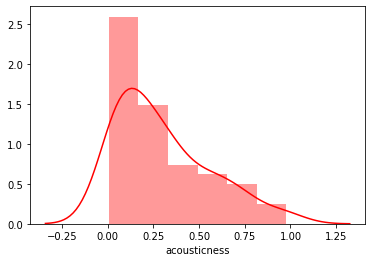

In [72]:
feature_details(df_2019['acousticness'])

*Conclusion*:people don't lisen more to the acoustics 

Mean value  0.49042


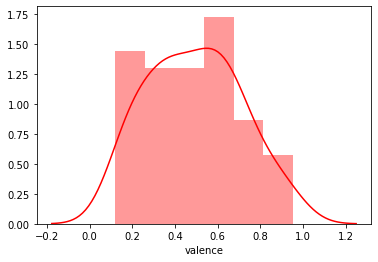

In [73]:
feature_details(df_2019['valence'])

*Conclusion*:songs are evenly distributed and totally depends upon the mood 

Mean value  120.42562


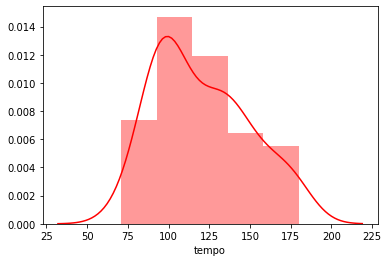

In [74]:
feature_details(df_2019['tempo'])

*Conclusion*:people listen fast songs more 

### Again construct a 3d graph  with out limited features for better understanding 

In [75]:

feture_to_plot = ["energy", "liveness", "tempo", "valence","danceability"]
text1 = df_2019["artists"] + " - " + df_2019["name"]
text2 = text1.values
X = df_2019[feture_to_plot].values
y = df_2019["danceability"].values
min_maxscaler = MinMaxScaler()
X = min_maxscaler.fit_transform(X)
pca = PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

plot3d = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],
    text=text2,
    mode="markers",
    marker=dict(
        size=8,
        color=y
    )
)

fig = go.Figure(data=[plot3d])
py.iplot(fig, filename="3d graph-2nd")


 ### create a popularity column depending on our matrices

In [77]:
df_2019["popularity"]=""
df_2019.loc[(df_2019['danceability']>=0.69) | (df_2019['energy']>=0.66)| (df_2019['loudness']>=-5.6)| (df_2019['acousticness']>=0.16)| 
            (df_2019['valence']>=0.51)| (df_2019['tempo']>=119.0),'popularity']='1'
df_2019.loc[(df_2019['danceability']<0.69) & (df_2019['energy']<0.66) & (df_2019['loudness']<-5.6),'popularity']='0'
df_2019.head()

df_2019.to_csv("../Data/df_2019_new.csv",index=False)

In [78]:
df_2019.head()

,Unnamed: 0,id,name,popularity,track.track_number,danceability,energy,key,loudness,mode,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artists,dancebility_new,tempo_rate
0,0,6v3KW9xbzN5yKLt9YKDYA2,Señorita,1,1,0.759,0.548,9,-6.049,0,...,0.0392,0.00,0.0828,0.749,116.967,190800,4,Shawn Mendes,1,fast
1,1,2Fxmhks0bxGSBdJ92vM42m,bad guy,1,2,0.701,0.425,7,-10.965,1,...,0.3280,0.13,0.1000,0.562,135.128,194088,4,Billie Eilish,1,fast
2,2,0RiRZpuVRbi7oqRdSMwhQY,Sunflower - Spider-Man: Into the Spider-Verse,1,12,0.755,0.522,2,-4.368,1,...,0.5330,0.00,0.0685,0.925,89.960,157560,4,Post Malone,1,moderate
3,3,6ocbgoVGwYJhOv1GgI9NsF,7 rings,1,10,0.778,0.317,1,-10.732,0,...,0.5920,0.00,0.0881,0.327,140.048,178627,4,Ariana Grande,1,fast
4,4,2YpeDb67231RjR0MgVLzsG,Old Town Road - Remix,1,1,0.878,0.619,6,-5.560,1,...,0.0533,0.00,0.1130,0.639,136.041,157067,4,Lil Nas X,1,fast


In [79]:
df_2019_new=pd.read_csv('../Data/df_2019_new.csv')


## corelation between features and popularity

In [80]:
def draw(year,compare_col,color):
    graph = sns.FacetGrid(df_2019_new, col = "popularity")
    graph.map(sns.distplot, compare_col, bins = 25,color=color)
    return plt.show()

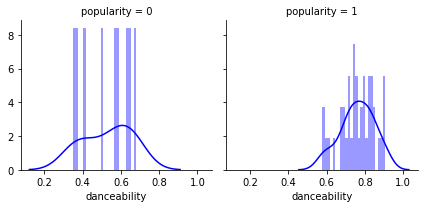

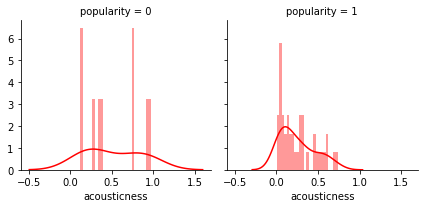

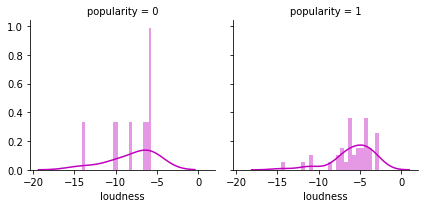

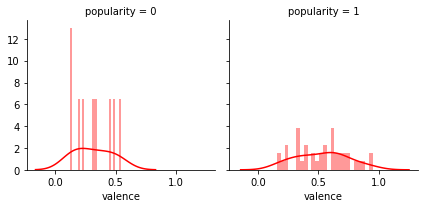

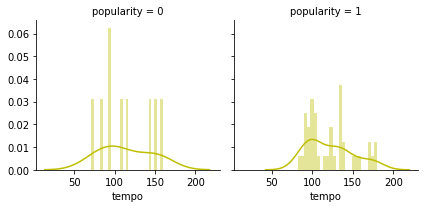

In [81]:
draw(df_2019_new,"danceability","b")
draw(df_2019_new,"acousticness","r")
draw(df_2019_new,"loudness","m")
draw(df_2019_new,"valence","r")
draw(df_2019_new,"tempo","y")


In [82]:
popularity_data = pd.concat([df_2019_new["name"],df_2019_new["popularity"]],axis=1)
popularity_data.head()

,name,popularity
0,Señorita,1
1,bad guy,1
2,Sunflower - Spider-Man: Into the Spider-Verse,1
3,7 rings,1
4,Old Town Road - Remix,1


In [83]:
df_2019_final=df_2019.copy()
df_2019_final.drop(["id","name","artists","tempo_rate","dancebility_new"],axis=1,inplace=True)
df_2019_final.columns


Index(['Unnamed: 0', 'popularity', 'track.track_number', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature'],
      dtype='object')

In [84]:
df_2019_final["key"] = df_2019_final["key"].astype("category")
df_2019_final = pd.get_dummies(df_2019_final, columns=["key"])
df_2019_final.head()

,Unnamed: 0,popularity,track.track_number,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,key_1,key_2,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,0,1,1,0.759,0.548,-6.049,0,0.0290,0.0392,0.00,...,0,0,0,0,0,0,0,1,0,0
1,1,1,2,0.701,0.425,-10.965,1,0.3750,0.3280,0.13,...,0,0,0,0,0,1,0,0,0,0
2,2,1,12,0.755,0.522,-4.368,1,0.0575,0.5330,0.00,...,0,1,0,0,0,0,0,0,0,0
3,3,1,10,0.778,0.317,-10.732,0,0.3340,0.5920,0.00,...,1,0,0,0,0,0,0,0,0,0
4,4,1,1,0.878,0.619,-5.560,1,0.1020,0.0533,0.00,...,0,0,0,0,1,0,0,0,0,0


In [85]:
df_2019_final["time_signature"] = df_2019_final["time_signature"].astype("category")
df_2019_final = pd.get_dummies(df_2019_final, columns=["time_signature"])
df_2019_final.head()

,Unnamed: 0,popularity,track.track_number,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,key_2,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_4
0,0,1,1,0.759,0.548,-6.049,0,0.0290,0.0392,0.00,...,0,0,0,0,0,0,1,0,0,1
1,1,1,2,0.701,0.425,-10.965,1,0.3750,0.3280,0.13,...,0,0,0,0,1,0,0,0,0,1
2,2,1,12,0.755,0.522,-4.368,1,0.0575,0.5330,0.00,...,1,0,0,0,0,0,0,0,0,1
3,3,1,10,0.778,0.317,-10.732,0,0.3340,0.5920,0.00,...,0,0,0,0,0,0,0,0,0,1
4,4,1,1,0.878,0.619,-5.560,1,0.1020,0.0533,0.00,...,0,0,0,1,0,0,0,0,0,1


In [91]:
def change_datatype(var):
    df_2019_final[var] = df_2019_final[var].astype(int)
    
columns= ["key_1","key_1","key_2",
         "key_4","key_5","key_6","key_7","key_8","key_9","key_10","key_11","time_signature_4"]
for column in columns:
    change_datatype(column)
    

In [92]:
def load_data():
    
    y = df_2019_final["popularity"].values
    X = df_2019_final.drop(["popularity"],axis=1)
    return X,y
X,y =load_data()

feature_cols = X.columns.to_list()

#### There is not a great  linear correlations in our data So, Decision Tree algorithms will give  better results as compared to linear regression models. Therfore using  Random Forest 
 

In [93]:

#x_data=X
X,y = load_data()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.6)
# X_train = X_train.T
# X_test = X_test.T
X_train=X_train[:None]
X_test=X_test[:None]
y_train = y_train.astype(int).T
y_test = y_test.astype(int).T
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)


X_train:  (20, 25)
X_test:  (30, 25)
y_train:  (20,)
y_test:  (30,)


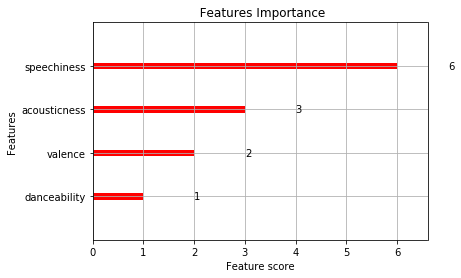

In [95]:
def plot_impfeature():
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    ax = plot_importance(xgb,color="r", height=0.15,
                         title='  Features Importance ', xlabel='Feature score', ylabel='Features',
                         importance_type='weight'
                        )

    return plt.show()


plot_impfeature()

##### The above graph assure that :
-  Our proposed ranked features turned out to be  most important for this data  
-  Example: we calculated features like :dancebility ,energy,loudness ets of most importance.And hence thus turned out true.

In [96]:
rf=RandomForestClassifier(random_state = 3)
rf.fit(X_train,y_train)

print("Train accuracy ",rf.score(X_train,y_train))
print("Test accuracy ",rf.score(X_test,y_test))

RandomForestClassifier_score=rf.score(X_test,y_test)
y_pred=rf.predict(X_test)
t_true=y_test

Train accuracy  1.0
Test accuracy  0.8333333333333334
